In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import all csv files

### 01_District_wise_crimes_committed_IPC_2001_2012

In [4]:
district_wise_crime_ipc=pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
district_wise_crime_ipc

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [5]:
#Shape of data
district_wise_crime_ipc.shape

(9017, 33)

There are 9017 rows and 33 columns

In [6]:
#check for missing values
district_wise_crime_ipc.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

It shows no null values are found

In [7]:
district_wise_crime_ipc.isnull().sum().any()

False

There is no other values are found

##### Data info:-

In [8]:
district_wise_crime_ipc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

##### DataType Analysis by plotting

<AxesSubplot:>

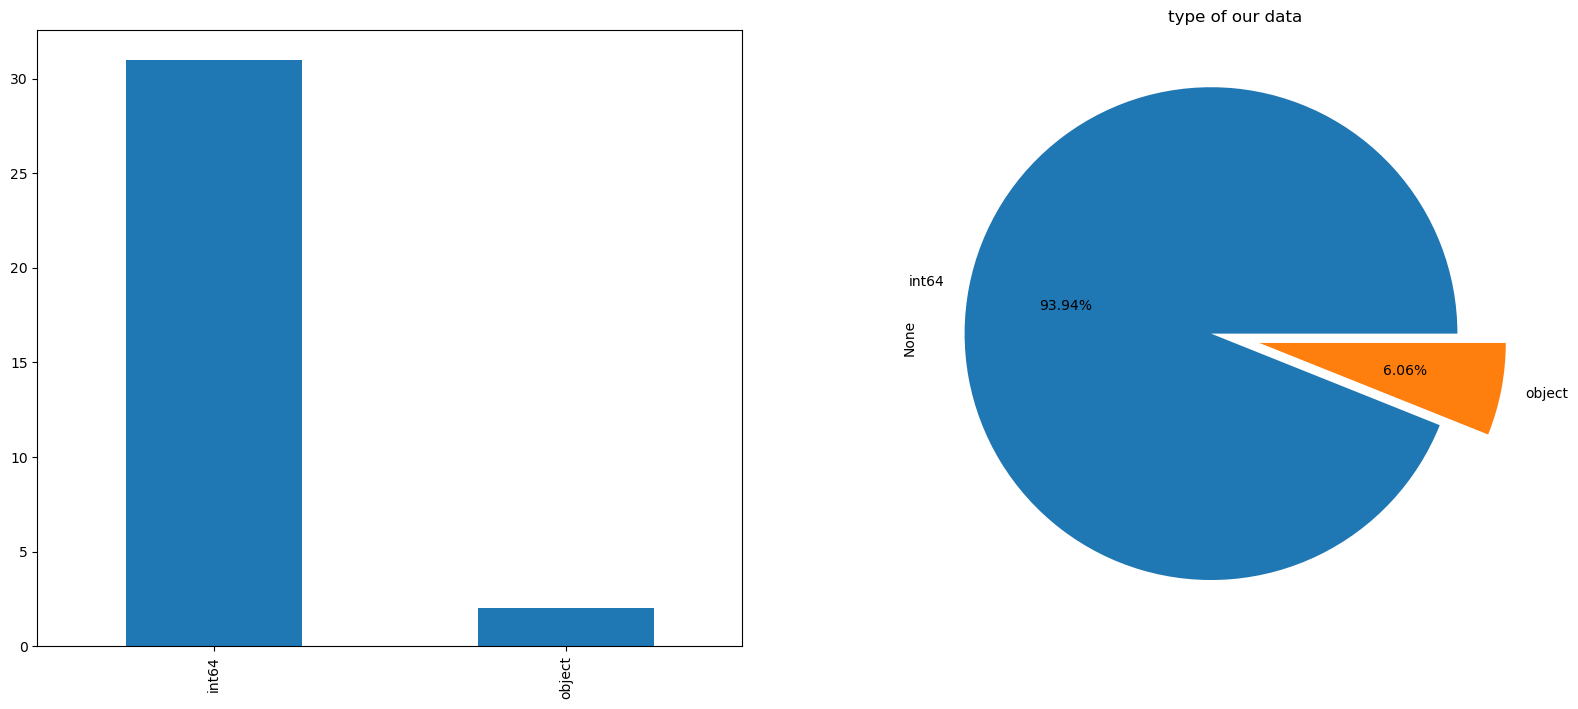

In [9]:
fig,types_of_data=plt.subplots(1,2,figsize=(20,8))

district_wise_crime_ipc.dtypes.value_counts().plot.pie(explode=[0.1,0.1],ax=types_of_data[1],autopct='%1.2f%%')

types_of_data[1].set_title("types of our data")


plt.title("type of our data")

district_wise_crime_ipc.dtypes.value_counts().plot(kind='bar',ax=types_of_data[0])

There are almost integer type data 93% and only 6% are object type

##### Now first check correlation

<AxesSubplot:>

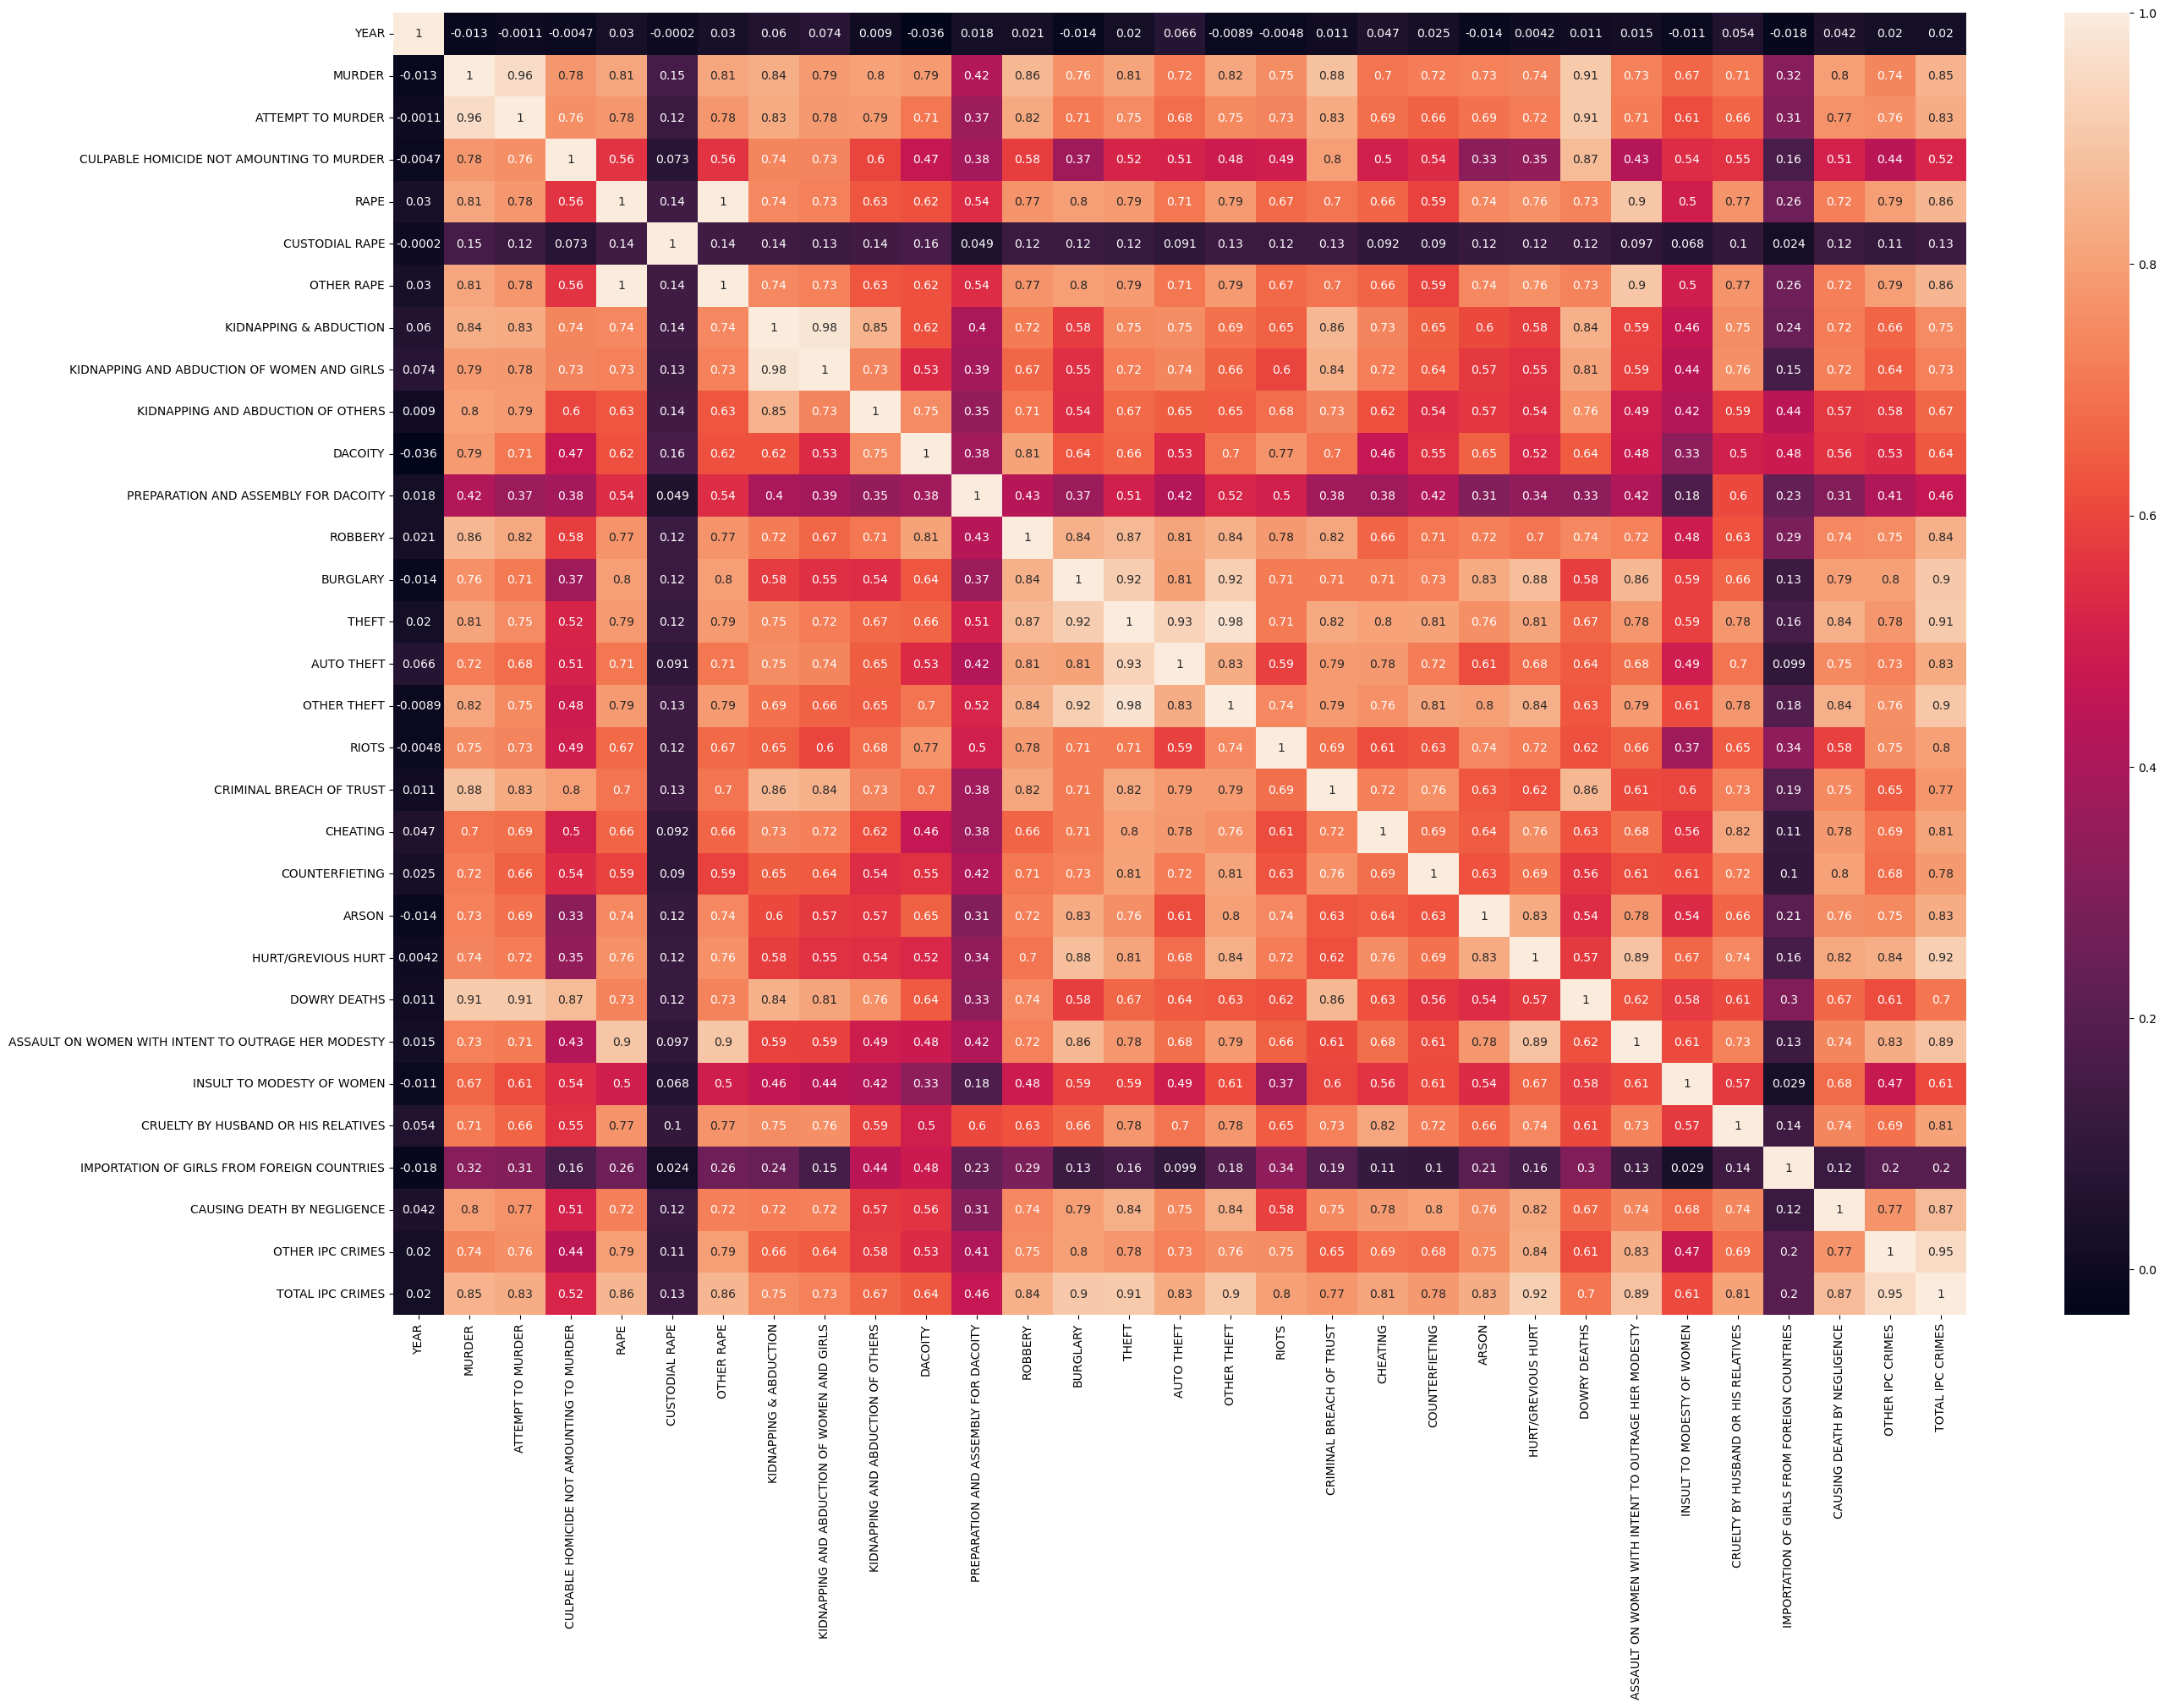

In [10]:
plt.figure(figsize=(30,20))
sns.heatmap(district_wise_crime_ipc.corr(),annot=True)

some columns highly positively correlated , so we will deleted those column

1. Rape,Other Rape and custodial Rape
2. other IPC crimes, Total IPC Crimes
3. Kidnapping & Abduction,Kidnapping and Abduction of other womens and girls and  Kidnaping and Abduction of others
4. Burglary , Theft, Auto Theft and other Theft
5. DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY and ROBBERY
6. Other IPC Crimes and Total IPc Crimes

These highly positively correlated with each other

In [11]:
# dropping the columns
district_wise_crime_ipc.drop(['CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS',
                             'DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','BURGLARY','AUTO THEFT','OTHER THEFT','OTHER IPC CRIMES'],axis=1,inplace=True)

In [12]:
# rename the column
district_wise_crime_ipc.rename(columns={'STATE/UT':'STATE'},inplace=True)

In [13]:
district_wise_crime_ipc.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,79.152046,55.066430,776.428968,171.881335,40.816458,...,5.926140,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,317.630964,220.576876,2935.008640,685.061783,172.042434,...,25.985903,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,10.000000,6.000000,88.000000,11.000000,4.000000,...,0.000000,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,25.000000,17.000000,217.000000,46.000000,11.000000,...,1.000000,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,56.000000,37.000000,466.000000,125.000000,28.000000,...,4.000000,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,8878.000000,6949.000000,53449.000000,11214.000000,4296.000000,...,599.000000,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,220335.000000


###### check for outliers

In [14]:
cols=['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'ROBBERY', 'THEFT', 'RIOTS',
       'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'TOTAL IPC CRIMES']

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


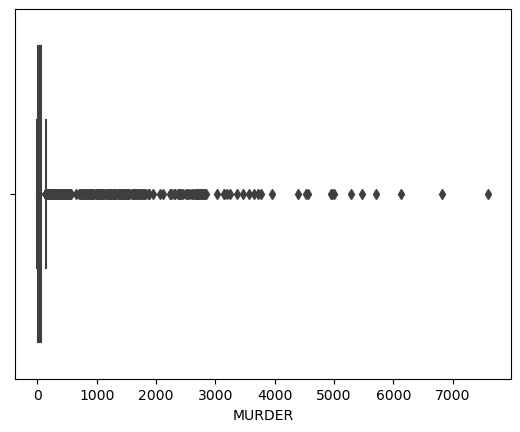

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


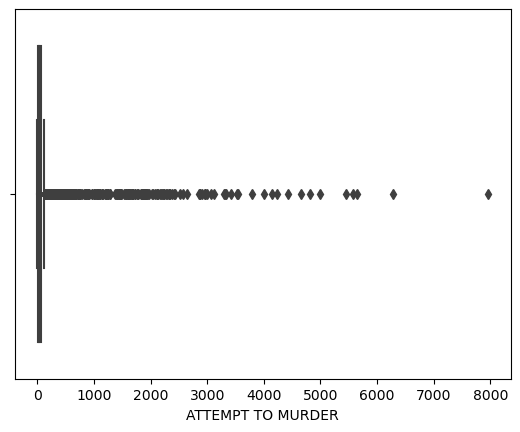

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


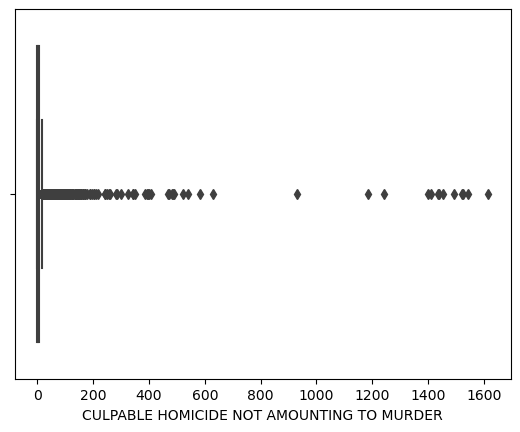

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


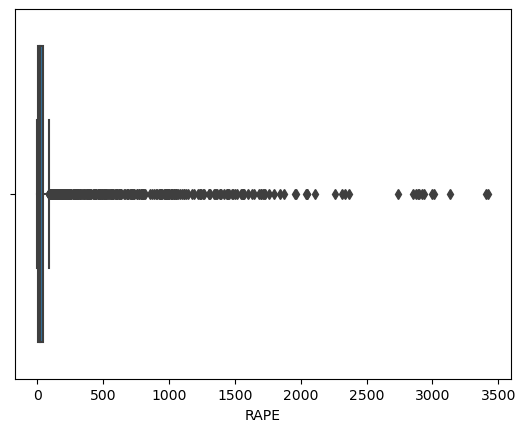

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


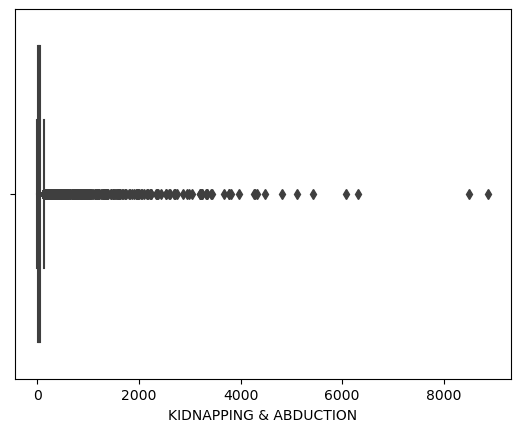

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


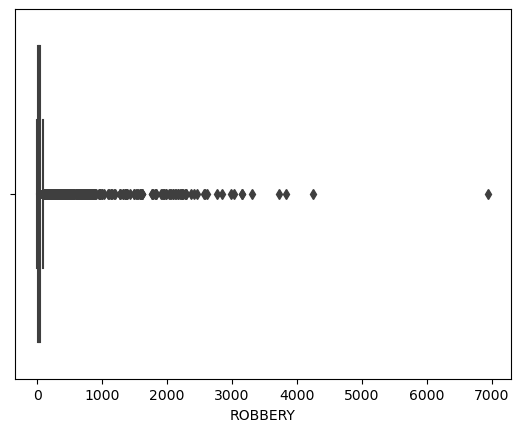

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


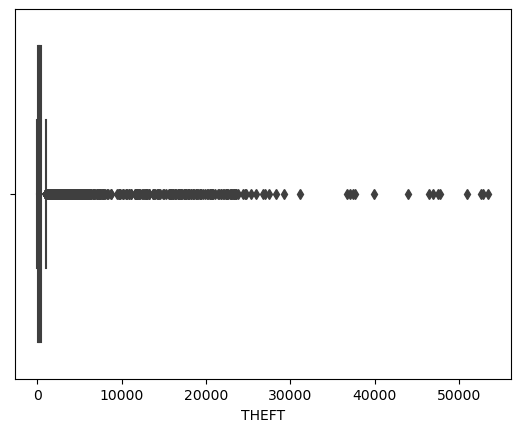

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


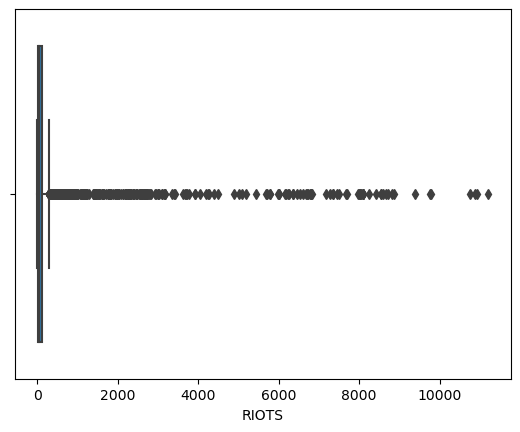

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


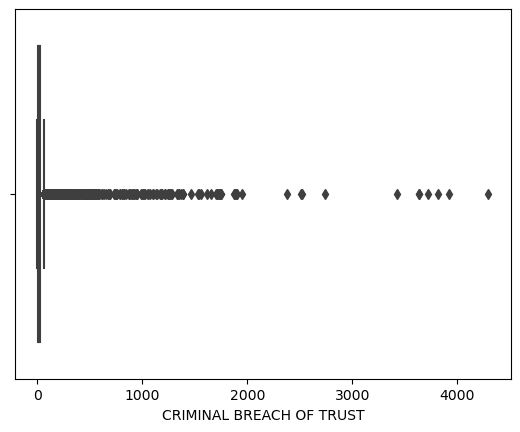

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


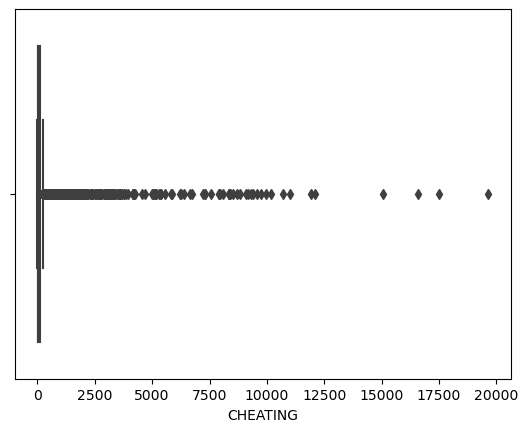

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


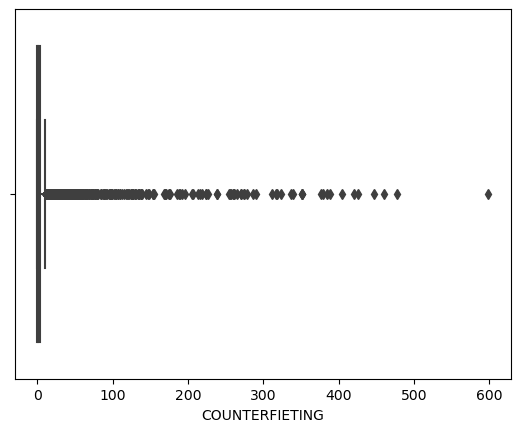

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


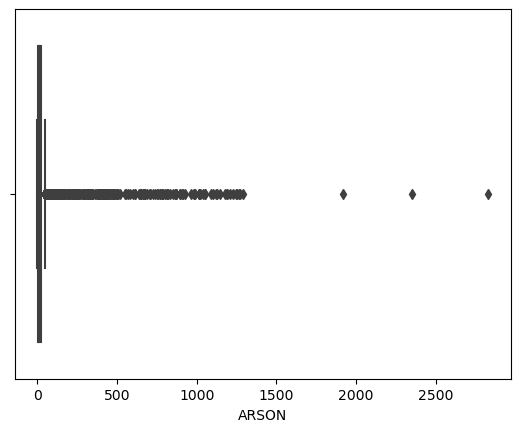

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


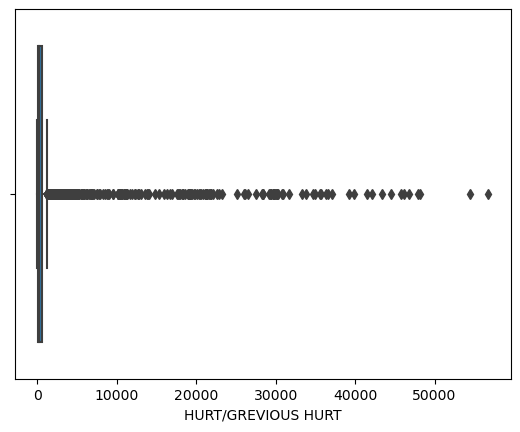

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


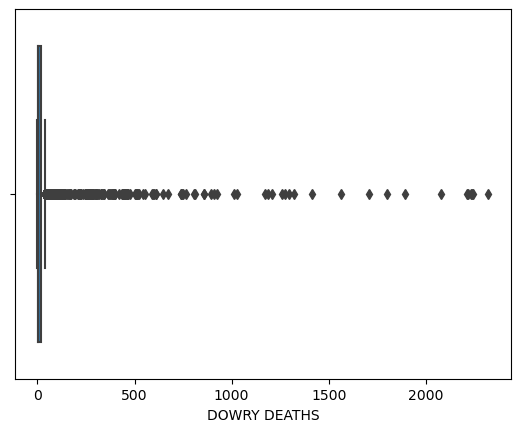

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


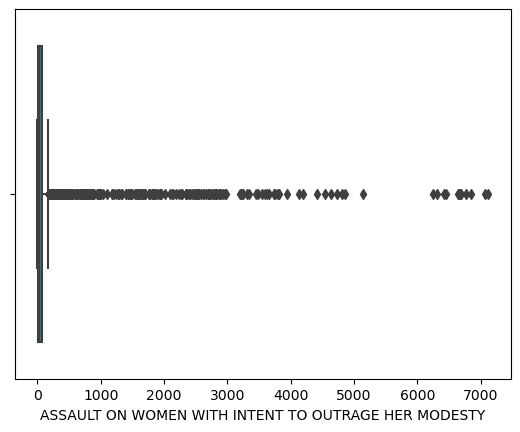

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


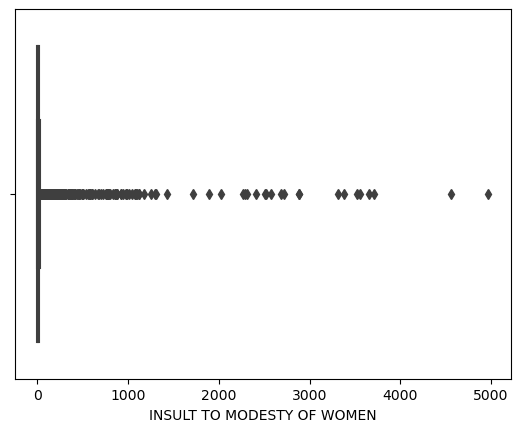

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


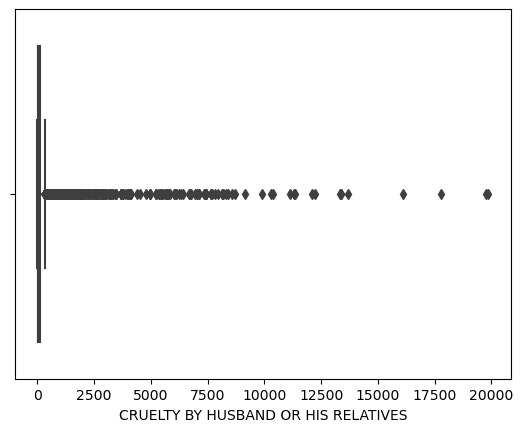

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


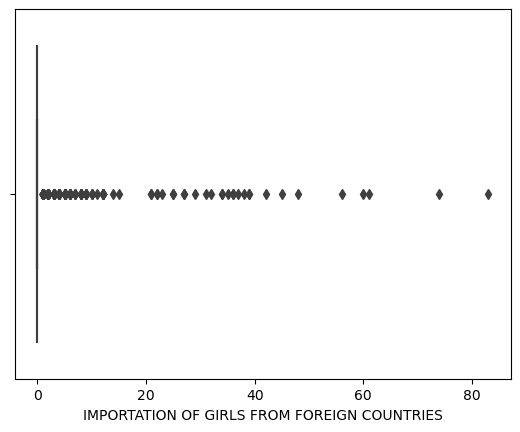

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


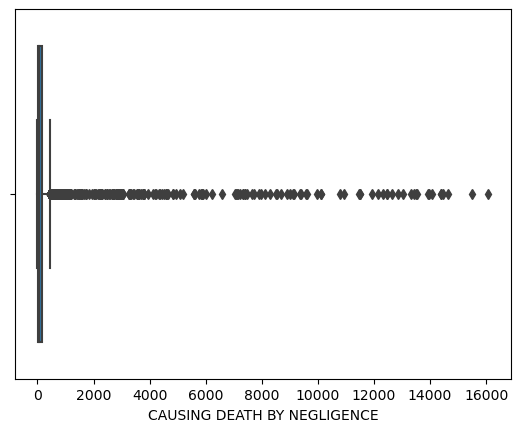

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


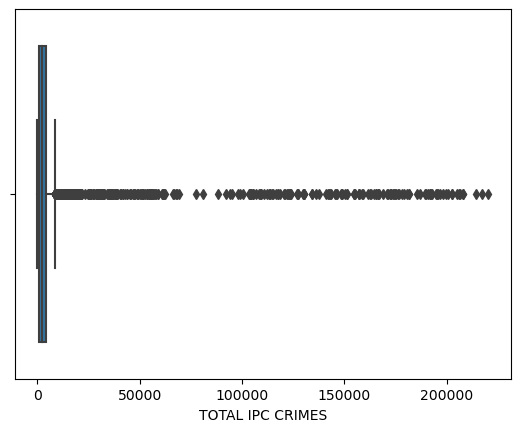

In [15]:
for i in cols:
    sns.boxplot(district_wise_crime_ipc[i])
    plt.show()

In [16]:
# Extract object dtypes 
ipc=district_wise_crime_ipc[['STATE','DISTRICT','YEAR']]

In [17]:
district_wise_crime_ipc.drop(['STATE','DISTRICT','YEAR'],axis=1,inplace=True)

In [18]:
# import library
from scipy.stats import zscore

# calculate zscore
z=np.abs(zscore(district_wise_crime_ipc))
z


,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,0.035796,0.059551,0.119366,0.015946,0.104379,0.063775,0.196749,0.137048,0.144254,0.089114,0.189580,0.048345,0.126691,0.043613,0.123056,0.038776,0.022985,0.081928,0.044037,0.062414
1,0.188582,0.154667,0.149459,0.157507,0.082339,0.177120,0.139847,0.005666,0.173318,0.141569,0.079812,0.442783,0.262938,0.136430,0.044383,0.021023,0.048228,0.081928,0.051053,0.063980
2,0.035796,0.069438,0.132657,0.136535,0.063448,0.186188,0.018205,0.023184,0.045436,0.052111,0.118296,0.129255,0.443166,0.064239,0.029156,0.331789,0.009763,0.081928,0.194223,0.027419
3,0.028373,0.082621,0.149459,0.173236,0.170497,0.231526,0.205608,0.011505,0.167506,0.179228,0.151096,0.022452,0.015578,0.033300,0.064686,0.062695,0.164822,0.081928,0.011521,0.117156
4,0.022262,0.036482,0.149459,0.157507,0.094933,0.136316,0.083334,0.148727,0.053382,0.066906,0.112611,0.159597,0.164060,0.084865,0.021543,0.182292,0.063559,0.081928,0.223071,0.064615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,0.272830,0.257291,0.166260,0.278095,0.249209,0.249661,0.262170,0.236315,0.237260,0.228993,0.228065,0.224728,0.246332,0.208620,0.252543,0.164539,0.232135,0.081928,0.237424,0.283432
9013,0.272830,0.257291,0.166260,0.278095,0.249209,0.249661,0.262170,0.236315,0.237260,0.228993,0.228065,0.224728,0.246332,0.208620,0.252543,0.164539,0.232135,0.081928,0.237424,0.283432
9014,0.257551,0.237517,0.132657,0.246637,0.242912,0.236060,0.236956,0.226096,0.231447,0.208818,0.189580,0.244955,0.185815,0.208620,0.250005,0.164539,0.232135,0.081928,0.190413,0.244184
9015,0.199493,0.188082,0.001755,0.241394,0.195685,0.190722,0.067952,0.091794,0.190757,0.128119,0.035642,0.052793,0.038325,0.208620,0.237316,0.152579,0.227327,0.081928,0.003437,0.098045


In [19]:
threshold=3
print(np.where(z>3))

(array([  28,   28,   28, ..., 8997, 8997, 8997], dtype=int64), array([0, 1, 3, ..., 4, 6, 9], dtype=int64))


In [20]:
ipc_crime=district_wise_crime_ipc[(z<3).all(axis=1)]
ipc_crime.reset_index(drop=True,inplace=True)

In [21]:
# concatination of two frames
crime_against_ipc=pd.concat([ipc,ipc_crime],axis=1)
crime_against_ipc.head()

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101.0,60.0,17.0,50.0,46.0,41.0,199.0,...,1.0,30.0,1131.0,16.0,149.0,34.0,175.0,0.0,181.0,4154.0
1,ANDHRA PRADESH,ANANTAPUR,2001,151.0,125.0,1.0,23.0,53.0,16.0,366.0,...,8.0,69.0,1543.0,7.0,118.0,24.0,154.0,0.0,270.0,4125.0
2,ANDHRA PRADESH,CHITTOOR,2001,101.0,57.0,2.0,27.0,59.0,14.0,723.0,...,9.0,38.0,2088.0,14.0,112.0,83.0,186.0,0.0,404.0,5818.0
3,ANDHRA PRADESH,CUDDAPAH,2001,80.0,53.0,1.0,20.0,25.0,4.0,173.0,...,2.0,23.0,795.0,17.0,126.0,38.0,57.0,0.0,233.0,3140.0
4,ANDHRA PRADESH,EAST GODAVARI,2001,82.0,67.0,1.0,23.0,49.0,25.0,1021.0,...,3.0,41.0,1244.0,12.0,109.0,58.0,247.0,0.0,431.0,6507.0


In [22]:
# Data info
crime_against_ipc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017 entries, 0 to 9016
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE                                                9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   int64  
 3   MURDER                                               8711 non-null   float64
 4   ATTEMPT TO MURDER                                    8711 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            8711 non-null   float64
 6   RAPE                                                 8711 non-null   float64
 7   KIDNAPPING & ABDUCTION                               8711 non-null   float64
 8   ROBBERY                                              8711 non-null  

In [23]:
# missing values
crime_against_ipc.isnull().sum()

STATE                                                    0
DISTRICT                                                 0
YEAR                                                     0
MURDER                                                 306
ATTEMPT TO MURDER                                      306
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              306
RAPE                                                   306
KIDNAPPING & ABDUCTION                                 306
ROBBERY                                                306
THEFT                                                  306
RIOTS                                                  306
CRIMINAL BREACH OF TRUST                               306
CHEATING                                               306
COUNTERFIETING                                         306
ARSON                                                  306
HURT/GREVIOUS HURT                                     306
DOWRY DEATHS                                           3

In [24]:
#drop nan values
crime_against_ipc.dropna(axis=0,inplace=True)

# change into integer from float
crime_against_ipc[cols] = crime_against_ipc[cols].astype(int).astype(str)
crime_against_ipc.head()

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,46,41,199,...,1,30,1131,16,149,34,175,0,181,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,53,16,366,...,8,69,1543,7,118,24,154,0,270,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,59,14,723,...,9,38,2088,14,112,83,186,0,404,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,25,4,173,...,2,23,795,17,126,38,57,0,233,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,49,25,1021,...,3,41,1244,12,109,58,247,0,431,6507


In [25]:
crime_against_ipc.dtypes

STATE                                                  object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                 object
ATTEMPT TO MURDER                                      object
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              object
RAPE                                                   object
KIDNAPPING & ABDUCTION                                 object
ROBBERY                                                object
THEFT                                                  object
RIOTS                                                  object
CRIMINAL BREACH OF TRUST                               object
CHEATING                                               object
COUNTERFIETING                                         object
ARSON                                                  object
HURT/GREVIOUS HURT                                     object
DOWRY DE

In [26]:
# change into appropriate data type
crime_against_ipc[cols] =crime_against_ipc[cols].apply(pd.to_numeric)
print(crime_against_ipc.dtypes)

STATE                                                  object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
KIDNAPPING & ABDUCTION                                  int64
ROBBERY                                                 int64
THEFT                                                   int64
RIOTS                                                   int64
CRIMINAL BREACH OF TRUST                                int64
CHEATING                                                int64
COUNTERFIETING                                          int64
ARSON                                                   int64
HURT/GREVIOUS HURT                                      int64
DOWRY DE

### 02_District_wise_crimes_committed_against_ST_2001_2012   file Analysis

In [27]:
district_wise_crime_st=pd.read_csv("02_District_wise_crimes_committed_against_ST_2001_2012.csv")
district_wise_crime_st.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [28]:
# shape of data
district_wise_crime_st.shape

(9018, 13)

In [29]:
# data info
district_wise_crime_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9018 entries, 0 to 9017
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   STATE/UT                              9018 non-null   object
 1   DISTRICT                              9018 non-null   object
 2   Year                                  9018 non-null   int64 
 3   Murder                                9018 non-null   int64 
 4   Rape                                  9018 non-null   int64 
 5   Kidnapping Abduction                  9018 non-null   int64 
 6   Dacoity                               9018 non-null   int64 
 7   Robbery                               9018 non-null   int64 
 8   Arson                                 9018 non-null   int64 
 9   Hurt                                  9018 non-null   int64 
 10  Protection of Civil Rights (PCR) Act  9018 non-null   int64 
 11  Prevention of atrocities (POA)

In [30]:
district_wise_crime_st.isnull().sum().any()

False

<AxesSubplot:>

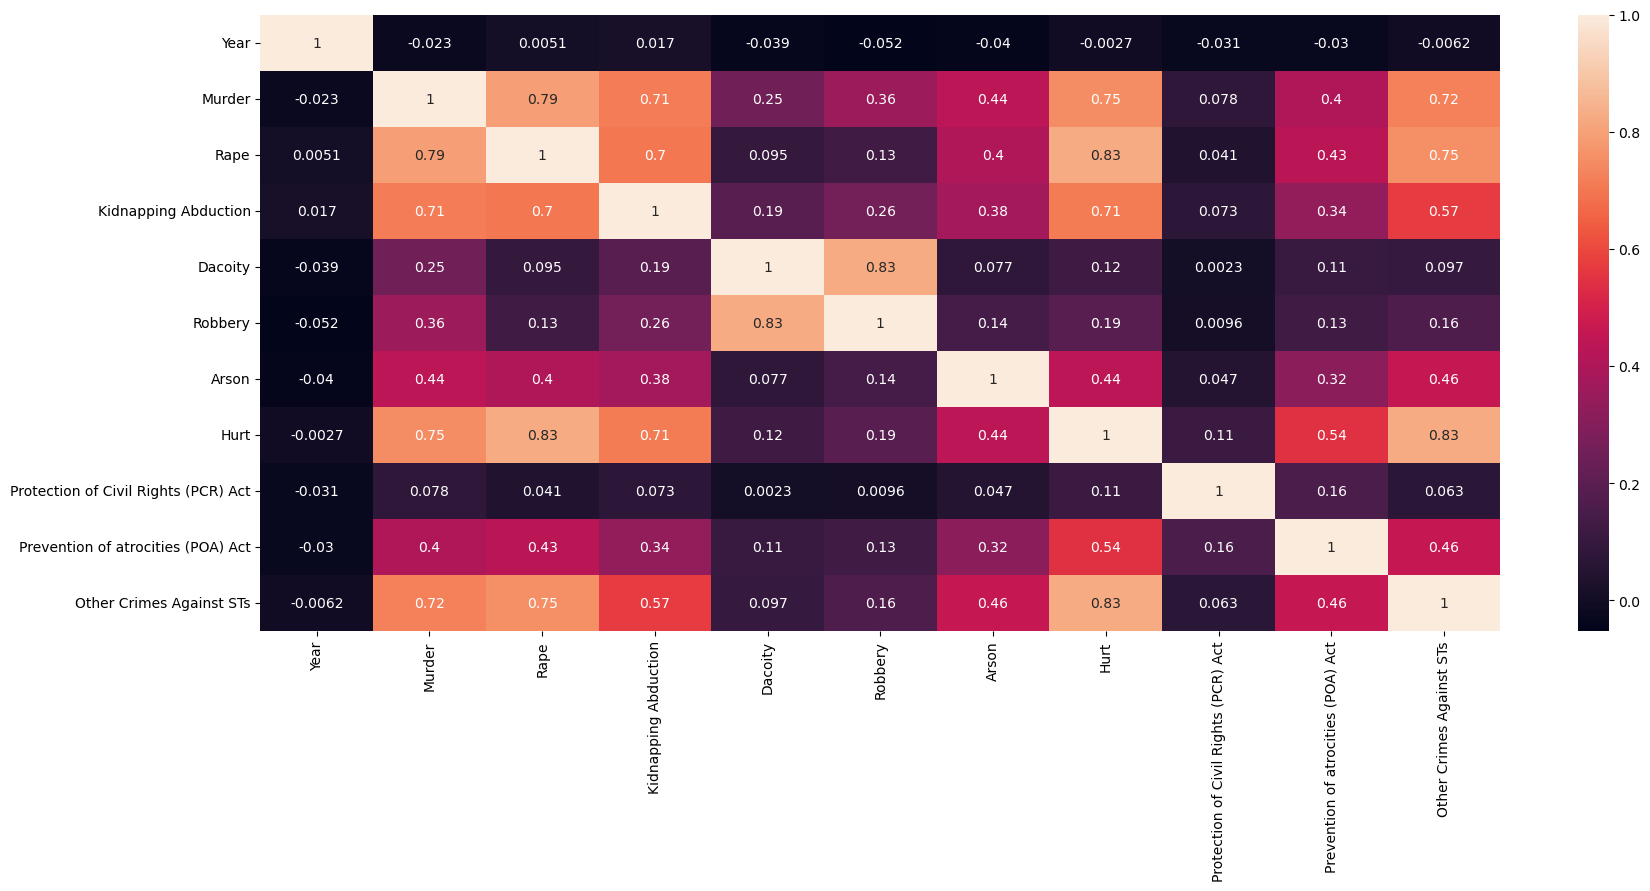

In [31]:
# check correlation
plt.figure(figsize=(20,8))
sns.heatmap(district_wise_crime_st.corr(),annot=True)

###### from above visualization Dacoity and Robbery are very much correlate to each other
so we will drop Dacoity from the data frame

In [32]:
# drop column
district_wise_crime_st.drop(['Dacoity'],axis=1,inplace=True)

In [33]:
district_wise_crime_st.sample()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
5024,UTTAR PRADESH,MORADABAD,2007,0,0,0,0,0,0,0,0,0


In [34]:
district_wise_crime_st=district_wise_crime_st.rename(columns={"Kidnapping Abduction":"Kidnapping"})
district_wise_crime_st=district_wise_crime_st.rename(columns={"STATE/UT":"STATE"})

In [35]:
district_wise_crime_st.columns

Index(['STATE', 'DISTRICT', 'Year', 'Murder', 'Rape', 'Kidnapping', 'Robbery',
       'Arson', 'Hurt', 'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [36]:
# create list
col=['Year', 'Murder', 'Rape', 'Kidnapping',
       'Robbery', 'Arson', 'Hurt', 'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs']

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


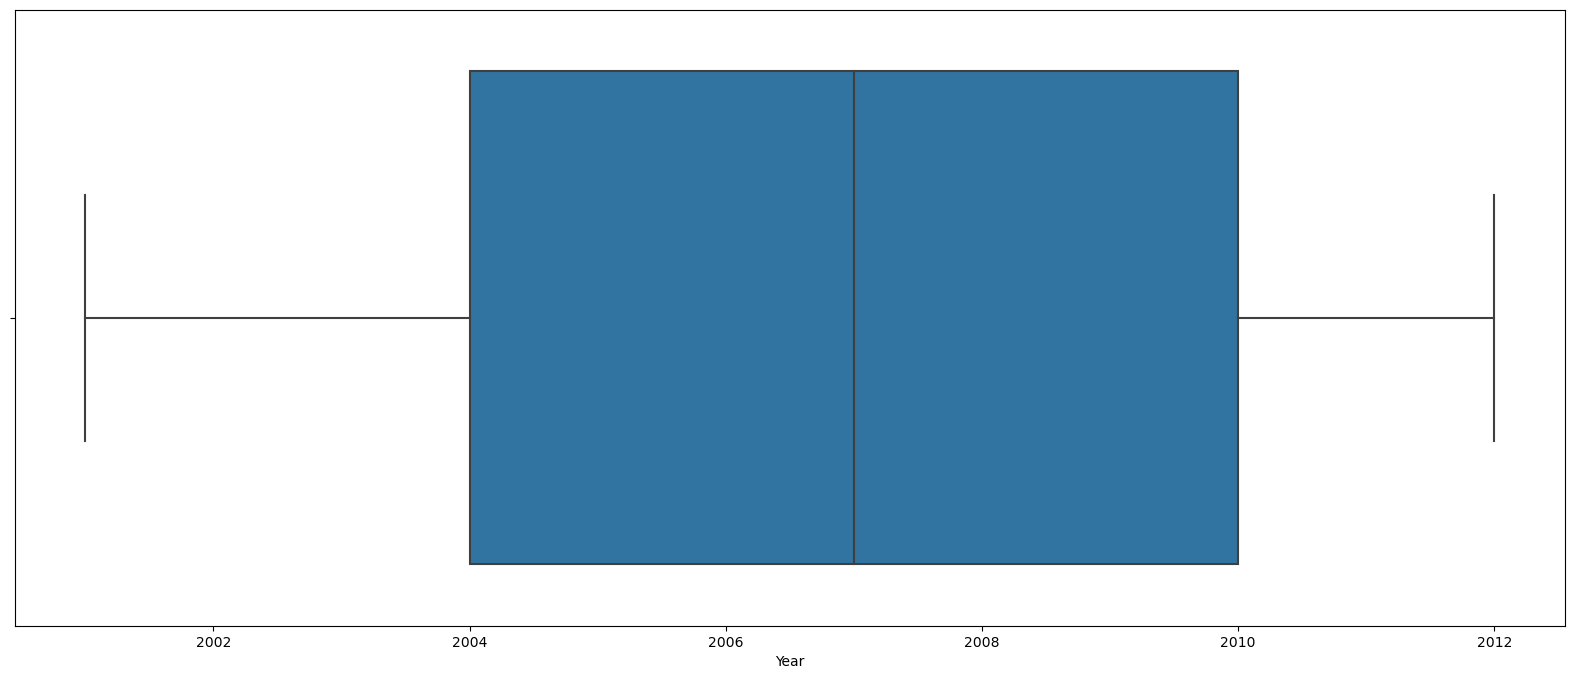

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


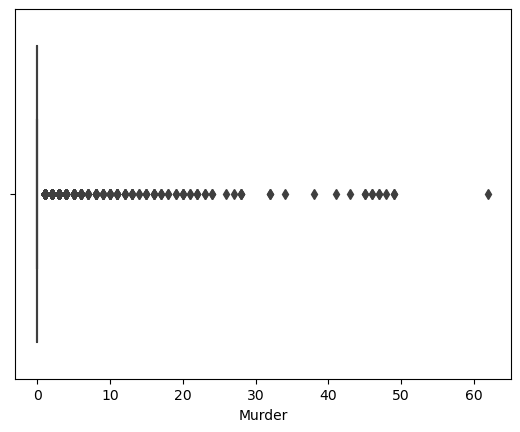

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


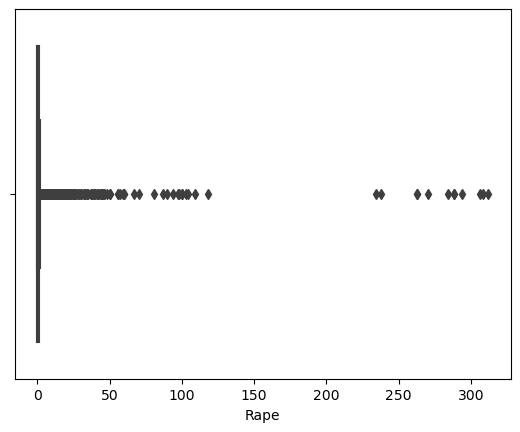

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


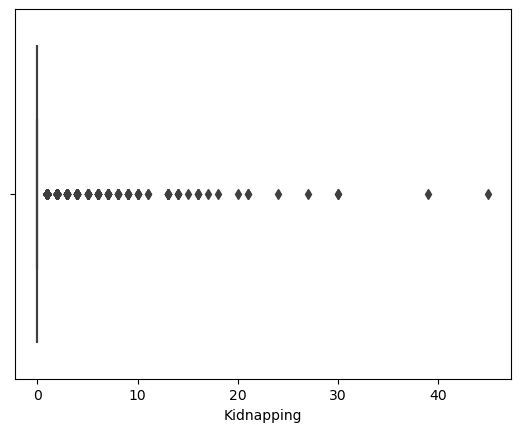

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


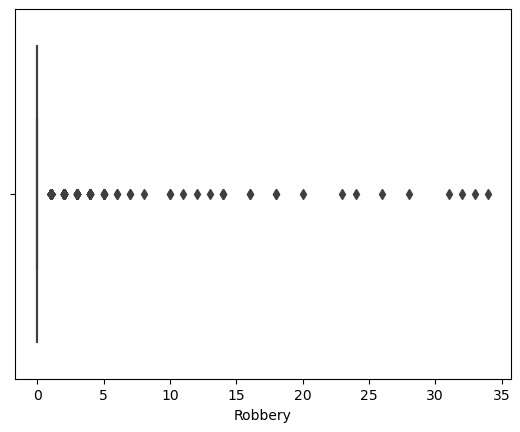

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


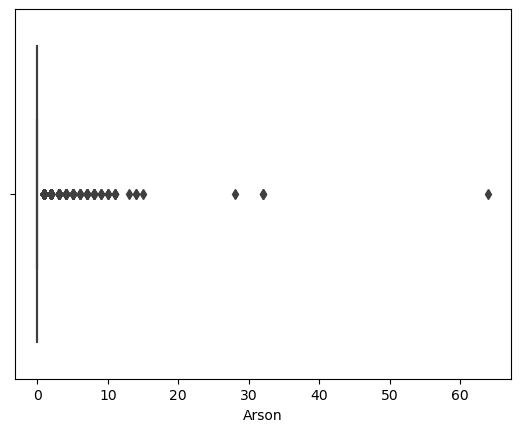

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


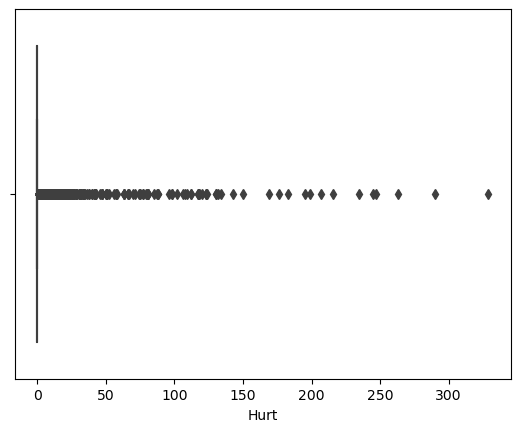

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


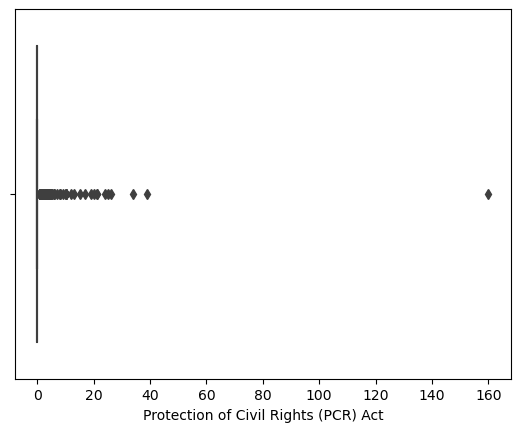

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


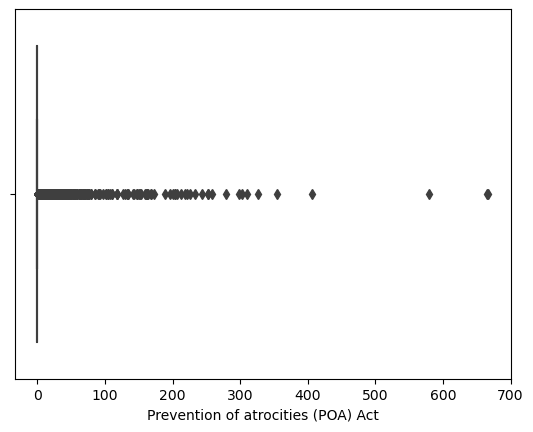

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


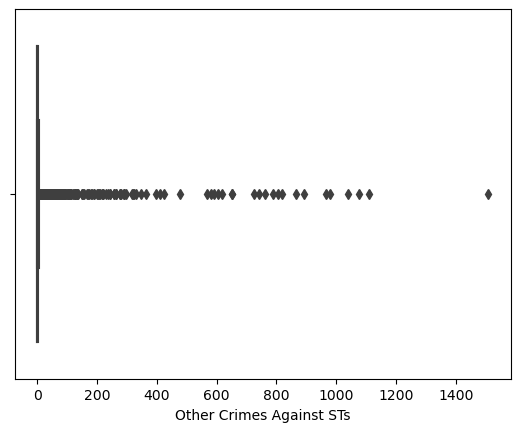

In [37]:
# checking for outliers
plt.figure(figsize=(20,8))
for i in col:
    sns.boxplot(district_wise_crime_st[i],)
    plt.show()

In [38]:
# Extract object data type columns 
district_wise_crime_against_st=district_wise_crime_st[['STATE','DISTRICT']]

In [39]:
# drop the columns
district_wise_crime_st.drop(['STATE','DISTRICT'],axis=1,inplace=True)

In [40]:
# import library
from scipy.stats import zscore


In [41]:
# calculate zscore
z=np.abs(zscore(district_wise_crime_st))
z

,Year,Murder,Rape,Kidnapping,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,1.625295,0.168468,0.058856,1.307188,0.081756,0.107957,0.010549,0.04451,0.161606,0.121759
1,1.625295,0.168468,0.145609,0.162115,0.081756,0.107957,0.405229,0.04451,0.112394,0.029323
2,1.625295,0.168468,0.145609,0.162115,0.081756,0.107957,0.010549,0.04451,0.161606,0.158822
3,1.625295,0.168468,0.145609,0.162115,0.081756,0.107957,0.010549,0.04451,0.063182,0.158822
4,1.625295,0.168468,0.145609,0.162115,0.081756,0.107957,0.176860,0.04451,0.161606,0.143342
...,...,...,...,...,...,...,...,...,...,...
9013,1.550884,0.168468,0.145609,0.162115,0.081756,0.107957,0.176860,0.04451,0.161606,0.158822
9014,1.550884,0.168468,0.145609,0.162115,0.081756,0.107957,0.176860,0.04451,0.161606,0.158822
9015,1.550884,0.168468,0.145609,0.162115,0.081756,0.107957,0.176860,0.04451,0.161606,0.158822
9016,1.550884,0.168468,0.145609,0.162115,0.081756,0.107957,0.176860,0.04451,0.161606,0.158822


In [42]:
threshold=3
print(np.where(z>3))

(array([  25,   28,   28,   28,   28,   28,   42,   74,  115,  131,  134,
        134,  134,  134,  134,  134,  145,  168,  168,  168,  168,  168,
        231,  249,  250,  253,  253,  253,  253,  256,  258,  285,  285,
        326,  351,  351,  351,  351,  351,  351,  351,  397,  427,  427,
        433,  435,  435,  435,  435,  436,  436,  470,  470,  470,  470,
        470,  513,  513,  529,  529,  529,  529,  529,  529,  529,  650,
        650,  726,  741,  744,  744,  744,  744,  744,  758,  839,  850,
        851,  851,  851,  851,  851,  851,  862,  885,  885,  885,  885,
        970,  970, 1002, 1002, 1034, 1050, 1068, 1068, 1068, 1068, 1068,
       1068, 1068, 1068, 1114, 1114, 1114, 1114, 1135, 1141, 1141, 1144,
       1144, 1151, 1152, 1152, 1152, 1187, 1187, 1187, 1187, 1187, 1187,
       1230, 1246, 1246, 1246, 1246, 1246, 1246, 1444, 1457, 1464, 1464,
       1464, 1464, 1464, 1480, 1553, 1555, 1574, 1574, 1574, 1574, 1574,
       1574, 1578, 1585, 1608, 1608, 1608, 1608, 1

In [43]:
st_crime=district_wise_crime_st[(z<3).all(axis=1)]
st_crime

,Year,Murder,Rape,Kidnapping,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,2001,0,1,2,0,0,2,0,0,13
1,2001,0,0,0,0,0,7,0,1,6
2,2001,0,0,0,0,0,2,0,0,0
3,2001,0,0,0,0,0,2,0,2,0
4,2001,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...
9013,2012,0,0,0,0,0,0,0,0,0
9014,2012,0,0,0,0,0,0,0,0,0
9015,2012,0,0,0,0,0,0,0,0,0
9016,2012,0,0,0,0,0,0,0,0,0


In [44]:
# concatination of two frames
crime_against_st=pd.concat([district_wise_crime_against_st,st_crime],axis=1)

In [45]:
crime_against_st

,STATE,DISTRICT,Year,Murder,Rape,Kidnapping,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,13.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0,6.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
4,ANDHRA PRADESH,EAST GODAVARI,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9014,LAKSHADWEEP,TOTAL,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9015,PUDUCHERRY,KARAIKAL,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9016,PUDUCHERRY,PUDUCHERRY,2012.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
crime_against_st.isnull().sum()

STATE                                     0
DISTRICT                                  0
Year                                    221
Murder                                  221
Rape                                    221
Kidnapping                              221
Robbery                                 221
Arson                                   221
Hurt                                    221
Protection of Civil Rights (PCR) Act    221
Prevention of atrocities (POA) Act      221
Other Crimes Against STs                221
dtype: int64

In [47]:
crime_against_st.dropna(axis=0,inplace=True)

In [48]:
crime_against_st.isnull().sum()

STATE                                   0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping                              0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

In [49]:
crime_against_st.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 9017
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   STATE                                 8797 non-null   object 
 1   DISTRICT                              8797 non-null   object 
 2   Year                                  8797 non-null   float64
 3   Murder                                8797 non-null   float64
 4   Rape                                  8797 non-null   float64
 5   Kidnapping                            8797 non-null   float64
 6   Robbery                               8797 non-null   float64
 7   Arson                                 8797 non-null   float64
 8   Hurt                                  8797 non-null   float64
 9   Protection of Civil Rights (PCR) Act  8797 non-null   float64
 10  Prevention of atrocities (POA) Act    8797 non-null   float64
 11  Other Crimes Agai

In [50]:
col

['Year',
 'Murder',
 'Rape',
 'Kidnapping',
 'Robbery',
 'Arson',
 'Hurt',
 'Protection of Civil Rights (PCR) Act',
 'Prevention of atrocities (POA) Act',
 'Other Crimes Against STs']

In [51]:
# change into integer from float

crime_against_st[col] = crime_against_st[col].astype(int).astype(str)


In [53]:
# change the data type into appropriate dtypes
crime_against_st[col] =crime_against_st [col].apply(pd.to_numeric)
print(crime_against_st.dtypes)

STATE                                   object
DISTRICT                                object
Year                                     int64
Murder                                   int64
Rape                                     int64
Kidnapping                               int64
Robbery                                  int64
Arson                                    int64
Hurt                                     int64
Protection of Civil Rights (PCR) Act     int64
Prevention of atrocities (POA) Act       int64
Other Crimes Against STs                 int64
dtype: object


### 42_District_wise_crimes_committed_against_women_2001_2012.csv

In [54]:
district_wise_crime_Women=pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")
district_wise_crime_Women.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [55]:
# check data info
district_wise_crime_Women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

There is no null values

In [56]:
# change column name
district_wise_crime_Women=district_wise_crime_Women.rename(columns={"STATE/UT":"STATE","Kidnapping and Abduction":"Kidnapping"})
district_wise_crime_Women

,STATE,DISTRICT,Year,Rape,Kidnapping,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


# Create seperate table for each file

In [57]:
import sqlite3 as sql

In [58]:
District_wise_crime_women=sql.connect("42_District_wise_crimes_committed_against_women_2001_2012.db")

In [59]:
cur=District_wise_crime_women.cursor()


###  3.1  District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [ ]:
district_wise_crime_Women.to_sql('crimes_against_women',District_wise_crime_women )

In [60]:
query = 'SELECT * FROM crimes_against_women' 

In [62]:
df=pd.read_sql_query(query,District_wise_crime_women)
df

,index,STATE,DISTRICT,Year,Rape,Kidnapping,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
9012,9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


######    3.2    Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [64]:
query1=('Select STATE,DISTRICT,Year, MAX(Rape) From crimes_against_women  ')

In [65]:
Max_rape=pd.read_sql_query(query1,District_wise_crime_women)
Max_rape

,STATE,DISTRICT,Year,MAX(Rape)
0,MADHYA PRADESH,TOTAL,2012,3425


In [66]:
querry2=('Select STATE,DISTRICT,Year, MAX(Kidnapping) From crimes_against_women  ')

Max_kidnapping=pd.read_sql_query(querry2,District_wise_crime_women)
Max_kidnapping

,STATE,DISTRICT,Year,MAX(Kidnapping)
0,UTTAR PRADESH,TOTAL,2012,7910


In [67]:
querry3=('Select  STATE ,DISTRICT FROM crimes_against_women  where DISTRICT="TOTAL"')
state=pd.read_sql_query(querry3,District_wise_crime_women)
state

,STATE,DISTRICT
0,ANDHRA PRADESH,TOTAL
1,ARUNACHAL PRADESH,TOTAL
2,ASSAM,TOTAL
3,BIHAR,TOTAL
4,CHHATTISGARH,TOTAL
...,...,...
403,CHANDIGARH,TOTAL
404,D & N HAVELI,TOTAL
405,DAMAN & DIU,TOTAL
406,LAKSHADWEEP,TOTAL


###### 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year


In [68]:
#Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

Min_rape=cur.execute('Select STATE,DISTRICT,Year, MIN(Rape) From crimes_against_women')
print(Min_rape.fetchall())

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)]


In [69]:
Min_kidnapping=cur.execute('Select STATE,DISTRICT,Year, MIN(Kidnapping) From crimes_against_women')
print(Min_kidnapping.fetchall())

[('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)]


##  3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [70]:
District_wise_crime_against_st=sql.connect("02_District_wise_crimes_committed_against_ST_2001_2012.db")

In [71]:
cur1=District_wise_crime_against_st.cursor()

In [ ]:
crime_against_st.to_sql('crime_committed_against_ST',District_wise_crime_against_st)

In [72]:
# show full table 
sql_query="SELECT * FROM crime_committed_against_ST"

In [73]:
Crime_against_ST=pd.read_sql_query(sql_query,District_wise_crime_against_st)
Crime_against_ST

,index,STATE,DISTRICT,Year,Murder,Rape,Kidnapping,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,2,0,0,13
1,1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,7,0,1,6
2,2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,2,0,0,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,2,0,2,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8792,9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0
8793,9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0
8794,9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0
8795,9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0


##### 3.5 SQL query to find the highest number of dacoity/robbery in which district.



In [ ]:
sql_query1="SELECT DISTRICT, MAX(Robbery) FROM crime_committed_against_ST"
max_robbery_district=pd.read_sql_query(sql_query1,District_wise_crime_against_st)
max_robbery_district

In [ ]:
#more info about Mon District
sql_query_="SELECT STATE, DISTRICT, count(DISTRICT)  FROM crime_committed_against_ST WHERE DISTRICT='MON'Group By STATE, DISTRICT "
state=pd.read_sql_query(sql_query_,District_wise_crime_against_st)
state

##### 3.6 SQL query to find in which districts(All) the lowest number of murders happened



In [74]:
# find out lowest 
murder=cur1.execute("Select Min(Murder) FROM crime_committed_against_ST ")
print(murder.fetchall())

[(0,)]


In [75]:
Min_murder=cur1.execute("SELECT  STATE,DISTRICT,COUNT(DISTRICT),Murder FROM crime_committed_against_ST  GROUP BY DISTRICT HAVING Murder=0")
print(Min_murder.fetchall())

[('WEST BENGAL', '24 PARGANAS NORTH', 12, 0), ('WEST BENGAL', '24 PARGANAS SOUTH', 12, 0), ('A & N ISLANDS', 'A and N ISLANDS', 1, 0), ('ANDHRA PRADESH', 'ADILABAD', 12, 0), ('UTTAR PRADESH', 'AGRA', 12, 0), ('GUJARAT', 'AHMEDABAD COMMR.', 11, 0), ('GUJARAT', 'AHMEDABAD RURAL', 12, 0), ('GUJARAT', 'AHWA-DANG', 12, 0), ('MIZORAM', 'AIZAWL', 12, 0), ('RAJASTHAN', 'AJMER', 12, 0), ('MAHARASHTRA', 'AKOLA', 12, 0), ('KERALA', 'ALAPUZHA', 12, 0), ('MADHYA PRADESH', 'ALIRAJPUR', 5, 0), ('UTTAR PRADESH', 'ALLAHABAD', 12, 0), ('UTTARAKHAND', 'ALMORA', 12, 0), ('RAJASTHAN', 'ALWAR', 12, 0), ('HARYANA', 'AMBALA', 11, 0), ('HARYANA', 'AMBALA RURAL', 1, 0), ('HARYANA', 'AMBALA URBAN', 1, 0), ('UTTAR PRADESH', 'AMBEDKAR NAGAR', 12, 0), ('MAHARASHTRA', 'AMRAVATI COMMR.', 12, 0), ('MAHARASHTRA', 'AMRAVATI RURAL', 12, 0), ('GUJARAT', 'AMRELI', 12, 0), ('PUNJAB', 'AMRITSAR', 10, 0), ('PUNJAB', 'AMRITSAR RURAL', 5, 0), ('GUJARAT', 'ANAND', 12, 0), ('ANDHRA PRADESH', 'ANANTAPUR', 12, 0), ('JAMMU & KASHMIR

In [76]:
Min_murder_=("SELECT  STATE,DISTRICT,COUNT(DISTRICT),Murder FROM crime_committed_against_ST  GROUP BY DISTRICT HAVING Murder=0")
Min_murder=pd.read_sql_query(Min_murder_,District_wise_crime_against_st)
Min_murder

,STATE,DISTRICT,COUNT(DISTRICT),Murder
0,WEST BENGAL,24 PARGANAS NORTH,12,0
1,WEST BENGAL,24 PARGANAS SOUTH,12,0
2,A & N ISLANDS,A and N ISLANDS,1,0
3,ANDHRA PRADESH,ADILABAD,12,0
4,UTTAR PRADESH,AGRA,12,0
...,...,...,...,...
724,SIKKIM,WEST,36,0
725,ANDHRA PRADESH,WEST GODAVARI,12,0
726,KARNATAKA,YADGIRI,3,0
727,HARYANA,YAMUNANAGAR,12,0


### 3.7 SQL query to find the number of murders in ascending order in district and yearwise

###### number of murder in ascending order district wise

In [77]:
# we find no. of Distinct District
Distinct_district=cur1.execute("Select COUNT(DISTINCT DISTRICT) From crime_committed_against_ST ")
print(Distinct_district.fetchall())

[(813,)]


In [78]:
asc_murder=cur1.execute("SELECT DISTRICT,count(DISTRICT) ,Murder FROM crime_committed_against_ST Group By DISTRICT ORDER BY DISTRICT ASC")
print(asc_murder.fetchall())

[('24 PARGANAS NORTH', 12, 0), ('24 PARGANAS SOUTH', 12, 0), ('A and N ISLANDS', 1, 0), ('ADILABAD', 12, 0), ('AGRA', 12, 0), ('AHMEDABAD COMMR.', 11, 0), ('AHMEDABAD RURAL', 12, 0), ('AHMEDNAGAR', 12, 1), ('AHWA-DANG', 12, 0), ('AIZAWL', 12, 0), ('AJMER', 12, 0), ('AKOLA', 12, 0), ('ALAPUZHA', 12, 0), ('ALIGARH', 12, 2), ('ALIRAJPUR', 5, 0), ('ALLAHABAD', 12, 0), ('ALMORA', 12, 0), ('ALWAR', 12, 0), ('AMBALA', 11, 0), ('AMBALA RURAL', 1, 0), ('AMBALA URBAN', 1, 0), ('AMBEDKAR NAGAR', 12, 0), ('AMRAVATI COMMR.', 12, 0), ('AMRAVATI RURAL', 12, 0), ('AMRELI', 12, 0), ('AMRITSAR', 10, 0), ('AMRITSAR RURAL', 5, 0), ('ANAND', 12, 0), ('ANANTAPUR', 12, 0), ('ANANTNAG', 13, 0), ('ANDAMAN', 10, 0), ('ANGUL', 11, 0), ('ANJAW', 4, 0), ('ANUPPUR', 10, 0), ('ARARIA', 12, 1), ('ARIYALUR', 5, 0), ('ARWAL', 12, 0), ('ASANSOL', 12, 0), ('ASHOK NAGAR', 10, 0), ('AURAIYA', 12, 0), ('AURANGABAD', 12, 0), ('AURANGABAD COMMR.', 12, 0), ('AURANGABAD RURAL', 12, 0), ('AWANTIPORA', 12, 0), ('AZAMGARH', 12, 0)

In [79]:
# import   in Data Frame
murder=("SELECT DISTRICT,count(DISTRICT) , YEAR,Murder FROM crime_committed_against_ST Group By DISTRICT ORDER BY DISTRICT ASC")
murder=pd.read_sql_query(murder,District_wise_crime_against_st)
murder

,DISTRICT,count(DISTRICT),Year,Murder
0,24 PARGANAS NORTH,12,2001,0
1,24 PARGANAS SOUTH,12,2001,0
2,A and N ISLANDS,1,2007,0
3,ADILABAD,12,2001,0
4,AGRA,12,2001,0
...,...,...,...,...
808,WOKHA,11,2002,3
809,YADGIRI,3,2010,0
810,YAMUNANAGAR,12,2001,0
811,YAVATMAL,12,2001,0


###### number of murder in ascending order yearwise

In [80]:
asc_yearwise=cur1.execute("SELECT DISTRICT,count(DISTRICT) , Year , Murder FROM crime_committed_against_ST Group By DISTRICT ORDER BY Year ASC")
print(asc_yearwise.fetchall())

[('24 PARGANAS NORTH', 12, 2001, 0), ('24 PARGANAS SOUTH', 12, 2001, 0), ('ADILABAD', 12, 2001, 0), ('AGRA', 12, 2001, 0), ('AHMEDABAD COMMR.', 11, 2001, 0), ('AHMEDABAD RURAL', 12, 2001, 0), ('AHMEDNAGAR', 12, 2001, 1), ('AHWA-DANG', 12, 2001, 0), ('AIZAWL', 12, 2001, 0), ('AJMER', 12, 2001, 0), ('AKOLA', 12, 2001, 0), ('ALAPUZHA', 12, 2001, 0), ('ALIGARH', 12, 2001, 2), ('ALLAHABAD', 12, 2001, 0), ('ALMORA', 12, 2001, 0), ('ALWAR', 12, 2001, 0), ('AMBALA', 11, 2001, 0), ('AMBEDKAR NAGAR', 12, 2001, 0), ('AMRAVATI COMMR.', 12, 2001, 0), ('AMRAVATI RURAL', 12, 2001, 0), ('AMRELI', 12, 2001, 0), ('AMRITSAR', 10, 2001, 0), ('ANAND', 12, 2001, 0), ('ANANTAPUR', 12, 2001, 0), ('ANANTNAG', 13, 2001, 0), ('ANDAMAN', 10, 2001, 0), ('ARARIA', 12, 2001, 1), ('ARIYALUR', 5, 2001, 0), ('ARWAL', 12, 2001, 0), ('ASANSOL', 12, 2001, 0), ('AURAIYA', 12, 2001, 0), ('AURANGABAD', 12, 2001, 0), ('AURANGABAD COMMR.', 12, 2001, 0), ('AURANGABAD RURAL', 12, 2001, 0), ('AWANTIPORA', 12, 2001, 0), ('AZAMGARH

In [81]:
# import   in Data Frame
sql_query4=("SELECT DISTRICT,count(DISTRICT) ,Year, Murder FROM crime_committed_against_ST Group By DISTRICT ORDER BY Year ASC")
yearwise=pd.read_sql_query(sql_query4,District_wise_crime_against_st)
yearwise

,DISTRICT,count(DISTRICT),Year,Murder
0,24 PARGANAS NORTH,12,2001,0
1,24 PARGANAS SOUTH,12,2001,0
2,ADILABAD,12,2001,0
3,AGRA,12,2001,0
4,AHMEDABAD COMMR.,11,2001,0
...,...,...,...,...
808,RAILWAYS KATRA,1,2012,0
809,SILIGURI_PC,1,2012,0
810,SIPAHIJALA,1,2012,0
811,SUKMA,1,2012,0


## 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table



In [84]:
District_wise_crimes_committed_IPC=sql.connect("District_wise_crimes_committed_IPC_2001_2012.db")

In [85]:
cur2=District_wise_crimes_committed_IPC.cursor()

In [ ]:
crime_against_ipc.to_sql("district_wise_crime_committed_ipc",District_wise_crimes_committed_IPC)

##### 3.8.1 SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [86]:
murder=cur2.execute("SELECT MURDER, DISTRICT, STATE, YEAR FROM district_wise_crime_committed_ipc WHERE MURDER>0")
print(murder.fetchall())

[(101, 'ADILABAD', 'ANDHRA PRADESH', 2001), (151, 'ANANTAPUR', 'ANDHRA PRADESH', 2001), (101, 'CHITTOOR', 'ANDHRA PRADESH', 2001), (80, 'CUDDAPAH', 'ANDHRA PRADESH', 2001), (82, 'EAST GODAVARI', 'ANDHRA PRADESH', 2001), (3, 'GUNTAKAL RLY.', 'ANDHRA PRADESH', 2001), (182, 'GUNTUR', 'ANDHRA PRADESH', 2001), (111, 'HYDERABAD CITY', 'ANDHRA PRADESH', 2001), (162, 'KARIMNAGAR', 'ANDHRA PRADESH', 2001), (93, 'KHAMMAM', 'ANDHRA PRADESH', 2001), (65, 'KRISHNA', 'ANDHRA PRADESH', 2001), (133, 'KURNOOL', 'ANDHRA PRADESH', 2001), (157, 'MAHABOOBNAGAR', 'ANDHRA PRADESH', 2001), (101, 'MEDAK', 'ANDHRA PRADESH', 2001), (122, 'NALGONDA', 'ANDHRA PRADESH', 2001), (89, 'NELLORE', 'ANDHRA PRADESH', 2001), (106, 'NIZAMABAD', 'ANDHRA PRADESH', 2001), (102, 'PRAKASHAM', 'ANDHRA PRADESH', 2001), (214, 'RANGA REDDY', 'ANDHRA PRADESH', 2001), (6, 'SECUNDERABAD RLY.', 'ANDHRA PRADESH', 2001), (38, 'SRIKAKULAM', 'ANDHRA PRADESH', 2001), (53, 'VIJAYAWADA', 'ANDHRA PRADESH', 2001), (2, 'VIJAYAWADA RLY.', 'ANDHRA 